In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Fast Food Analysis Project Spreadsheet.xlsx")

In [3]:
df.head()

,Unnamed: 0,Restaurant,Item Name,Calories,Protein (g),Total Fats (g),Sodium (mg),Total Sugars (g),Cholesterol (mg),Price ($),Carbs (g),Fiber (g),Item Type
0,NaN,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast
1,NaN,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast
2,NaN,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée
3,NaN,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
4,NaN,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Restaurant,Item Name,Calories,Protein (g),Total Fats (g),Sodium (mg),Total Sugars (g),Cholesterol (mg),Price ($),Carbs (g),Fiber (g),Item Type
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée


In [6]:
df.shape

(49, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant        49 non-null     object 
 1   Item Name         49 non-null     object 
 2   Calories          49 non-null     int64  
 3   Protein (g)       49 non-null     int64  
 4   Total Fats (g)    49 non-null     int64  
 5   Sodium (mg)       49 non-null     int64  
 6   Total Sugars (g)  49 non-null     int64  
 7   Cholesterol (mg)  49 non-null     int64  
 8   Price ($)         49 non-null     float64
 9   Carbs (g)         49 non-null     int64  
 10  Fiber (g)         49 non-null     int64  
 11  Item Type         49 non-null     object 
dtypes: float64(1), int64(8), object(3)
memory usage: 4.7+ KB


In [8]:
print(df.columns)

Index(['Restaurant', 'Item Name', 'Calories ', 'Protein (g)', 'Total Fats (g)',
       'Sodium (mg)', 'Total Sugars (g)', 'Cholesterol (mg)', 'Price ($)',
       'Carbs (g)', 'Fiber (g)', 'Item Type'],
      dtype='object')


In [9]:
df = df.rename(columns={'Restaurant': 'restaurant_name', 'Item Name': 'item_name', 'Calories ': 'calories', 'Protein (g)': 'protein',
 'Total Fats (g)': 'fats', 'Sodium (mg)': 'sodium', 'Total Sugars (g)': 'sugars',
 'Cholesterol (mg)': 'cholesterol', 'Price ($)': 'price', 'Carbs (g)': 'carbs', 
 'Fiber (g)': 'fiber', 'Item Type': 'item_type'})
df.head()

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée


In [10]:
df.isnull().sum()


restaurant_name    0
item_name          0
calories           0
protein            0
fats               0
sodium             0
sugars             0
cholesterol        0
price              0
carbs              0
fiber              0
item_type          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
## starting tier one analysis: basic averages, ranks of each restaurant and item with the highest calories, protein etc. 
df.describe()

,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.693878,20.204082,22.979592,1018.469388,8.959184,68.265306,6.604286,40.306122,2.938776
std,226.265902,14.850617,14.138437,733.132693,16.724432,64.835939,2.719396,21.897683,3.044176
min,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.820000,10.000000,0.000000
25%,270.000000,7.000000,14.000000,380.000000,2.000000,20.000000,4.550000,26.000000,1.000000
50%,430.000000,18.000000,21.000000,1010.000000,5.000000,60.000000,6.330000,42.000000,2.000000
75%,570.000000,29.000000,31.000000,1420.000000,10.000000,90.000000,7.490000,46.000000,4.000000
max,1270.000000,61.000000,78.000000,3070.000000,113.000000,315.000000,13.980000,129.000000,14.000000


In [13]:
## gonna use a loop to find top and bottom 10 of each metric (protein, fiber etc)
metrics = ['calories', 'protein', 'fats', 'sodium', 'cholesterol', 'price', 'carbs', 'fiber']

for metric in metrics:
    print(f"Top 10 {metric.title()}")
    display(df.sort_values(by=metric, ascending=False).head(10))

    print(f"Bottom 10 {metric.title()}")
    display(df.sort_values(by=metric, ascending=False).tail(10))

Top 10 Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
32,Taco Bell,Nachos BellGrande (Beef),730,17,39,1180,4,20,8.16,80,13,Entrée
46,Zaxbys,Birthday Cake Milkshake,730,13,19,600,113,60,3.30,129,0,Desert
34,Taco Bell,Grilled Cheese Burrito,710,25,39,1510,4,75,6.82,64,6,Entrée
39,Zaxbys,Fried White Cheddar Bites,700,27,46,1550,2,75,7.11,46,3,Side
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
45,Zaxbys,The Fried House Zalad,660,44,37,1920,4,90,13.98,42,4,Entrée
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée


Bottom 10 Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
27,Starbucks,Tall Caffé Mocha,200,7,9,75,18,30,6.15,22,2,Drink
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink


Top 10 Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée
45,Zaxbys,The Fried House Zalad,660,44,37,1920,4,90,13.98,42,4,Entrée
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
9,Chick-fil-A,Spicy Deluxe Sandwich,540,34,26,1880,7,85,8.39,47,2,Entrée
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée


Bottom 10 Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side
25,Starbucks,Butter Croissant,250,5,14,300,4,45,4.75,26,1,Desert
21,Starbucks,Tall Mocha Cookie Crumble Frappuccino,350,4,17,200,40,45,6.95,45,2,Drink
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink


Top 10 Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
39,Zaxbys,Fried White Cheddar Bites,700,27,46,1550,2,75,7.11,46,3,Side
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
32,Taco Bell,Nachos BellGrande (Beef),730,17,39,1180,4,20,8.16,80,13,Entrée
34,Taco Bell,Grilled Cheese Burrito,710,25,39,1510,4,75,6.82,64,6,Entrée
45,Zaxbys,The Fried House Zalad,660,44,37,1920,4,90,13.98,42,4,Entrée
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast


Bottom 10 Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée
27,Starbucks,Tall Caffé Mocha,200,7,9,75,18,30,6.15,22,2,Drink
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink


Top 10 Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
41,Zaxbys,Signature Sandwich,600,31,32,2200,8,75,8.70,45,2,Entrée
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
45,Zaxbys,The Fried House Zalad,660,44,37,1920,4,90,13.98,42,4,Entrée
9,Chick-fil-A,Spicy Deluxe Sandwich,540,34,26,1880,7,85,8.39,47,2,Entrée
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée
39,Zaxbys,Fried White Cheddar Bites,700,27,46,1550,2,75,7.11,46,3,Side


Bottom 10 Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side
21,Starbucks,Tall Mocha Cookie Crumble Frappuccino,350,4,17,200,40,45,6.95,45,2,Drink
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
27,Starbucks,Tall Caffé Mocha,200,7,9,75,18,30,6.15,22,2,Drink
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink


Top 10 Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast
22,Starbucks,"Bacon, Gouda, & Egg Sandwich",360,19,18,720,2,155,6.25,35,1,Breakfast
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée


Bottom 10 Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink
47,Zaxbys,Basket of Texas Toast,450,9,21,1020,5,0,3.95,57,3,Side
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side


Top 10 Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
45,Zaxbys,The Fried House Zalad,660,44,37,1920,4,90,13.98,42,4,Entrée
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée
43,Zaxbys,The Fried Cobb Zalad,780,55,45,2130,5,315,10.55,43,4,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
41,Zaxbys,Signature Sandwich,600,31,32,2200,8,75,8.70,45,2,Entrée
9,Chick-fil-A,Spicy Deluxe Sandwich,540,34,26,1880,7,85,8.39,47,2,Entrée


Bottom 10 Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
47,Zaxbys,Basket of Texas Toast,450,9,21,1020,5,0,3.95,57,3,Side
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side
46,Zaxbys,Birthday Cake Milkshake,730,13,19,600,113,60,3.30,129,0,Desert
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side
36,Taco Bell,Cinnamon Twists,170,1,6,115,10,0,1.82,27,1,Desert


Top 10 Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
46,Zaxbys,Birthday Cake Milkshake,730,13,19,600,113,60,3.30,129,0,Desert
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
32,Taco Bell,Nachos BellGrande (Beef),730,17,39,1180,4,20,8.16,80,13,Entrée
30,Taco Bell,Crunchwrap Supreme,530,15,20,1220,6,20,7.31,73,6,Entrée
31,Taco Bell,Beefy 5-Layer Burrito,490,17,18,1290,4,30,5.11,65,7,Entrée
34,Taco Bell,Grilled Cheese Burrito,710,25,39,1510,4,75,6.82,64,6,Entrée
17,Chick-fil-A,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,670,41,31,1930,12,110,10.45,57,3,Entrée
47,Zaxbys,Basket of Texas Toast,450,9,21,1020,5,0,3.95,57,3,Side
42,Zaxbys,Kickin Chicken Sandwich,690,34,39,2760,5,65,10.02,51,2,Entrée
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée


Bottom 10 Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
23,Starbucks,Tall Strawberry Açaí Lemonade Refresher,80,0,0,10,16,0,5.95,18,1,Drink
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink
11,Chick-fil-A,Small Mac & Cheese,270,12,17,710,2,40,4.55,17,2,Side
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée


Top 10 Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée
32,Taco Bell,Nachos BellGrande (Beef),730,17,39,1180,4,20,8.16,80,13,Entrée
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée
40,Zaxbys,Chicken Bacon Ranch Loaded Fries,1270,61,78,3070,2,145,12.39,88,8,Side
31,Taco Bell,Beefy 5-Layer Burrito,490,17,18,1290,4,30,5.11,65,7,Entrée
30,Taco Bell,Crunchwrap Supreme,530,15,20,1220,6,20,7.31,73,6,Entrée
34,Taco Bell,Grilled Cheese Burrito,710,25,39,1510,4,75,6.82,64,6,Entrée
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée


Bottom 10 Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast
46,Zaxbys,Birthday Cake Milkshake,730,13,19,600,113,60,3.30,129,0,Desert
24,Starbucks,Tall Iced Shaken Espresso,80,3,1,45,11,5,5.15,13,0,Drink
28,Starbucks,Short Caramel Macchiato,120,5,4,80,15,15,6.15,16,0,Drink
26,Starbucks,Birthday Cake Pop,160,2,8,95,16,10,3.25,21,0,Desert
19,Starbucks,Small Blonde Vanilla Latte,130,6,3,0,17,15,6.55,18,0,Drink
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée


In [14]:
#now gonna do a loop for the averages (gonna use medians, chose due to discovery of outliers) based on restaurants
for metric in metrics:
    print(f"Restaurants Ranked by Median {metric.title()} (High to Low)")

    ranked = df.groupby('restaurant_name')[metric].median().sort_values(ascending=False)
    display(ranked)

Restaurants Ranked by Median Calories (High to Low)


restaurant_name
Zaxbys         675.0
Taco Bell      510.0
Chick-fil-A    455.0
McDonald's     400.0
Starbucks      180.0
Name: calories, dtype: float64

Restaurants Ranked by Median Protein (High to Low)


restaurant_name
Zaxbys         32.5
Chick-fil-A    30.5
McDonald's     17.0
Taco Bell      17.0
Starbucks       5.0
Name: protein, dtype: float64

Restaurants Ranked by Median Fats (High to Low)


restaurant_name
Zaxbys         34.5
Taco Bell      24.0
Chick-fil-A    22.0
McDonald's     21.0
Starbucks       8.5
Name: fats, dtype: float64

Restaurants Ranked by Median Sodium (High to Low)


restaurant_name
Zaxbys         1975.0
Chick-fil-A    1315.0
Taco Bell      1095.0
McDonald's      920.0
Starbucks        87.5
Name: sodium, dtype: float64

Restaurants Ranked by Median Cholesterol (High to Low)


restaurant_name
Chick-fil-A    85.0
Zaxbys         75.0
McDonald's     70.0
Taco Bell      30.0
Starbucks      22.5
Name: cholesterol, dtype: float64

Restaurants Ranked by Median Price (High to Low)


restaurant_name
Zaxbys         9.360
Chick-fil-A    7.740
Taco Bell      6.575
Starbucks      6.050
McDonald's     4.290
Name: price, dtype: float64

Restaurants Ranked by Median Carbs (High to Low)


restaurant_name
Zaxbys         46.5
Taco Bell      46.0
Chick-fil-A    42.0
McDonald's     38.0
Starbucks      21.5
Name: carbs, dtype: float64

Restaurants Ranked by Median Fiber (High to Low)


restaurant_name
Taco Bell      5.5
Zaxbys         3.0
Chick-fil-A    2.0
McDonald's     2.0
Starbucks      1.0
Name: fiber, dtype: float64

In [15]:
#do the same as above but by item type now
for metric in metrics:
    print(f"Item Types Ranked by Median {metric.title()} (High to Low)")

    ranked = df.groupby('item_type')[metric].median().sort_values(ascending=False)
    display(ranked)

Item Types Ranked by Median Calories (High to Low)


item_type
Entrée       525.0
Breakfast    430.0
Side         375.0
Desert       210.0
Drink        125.0
Name: calories, dtype: float64

Item Types Ranked by Median Protein (High to Low)


item_type
Entrée       29.0
Breakfast    18.0
Side          7.0
Drink         4.5
Desert        3.5
Name: protein, dtype: float64

Item Types Ranked by Median Fats (High to Low)


item_type
Breakfast    26.0
Entrée       26.0
Side         20.0
Desert       11.0
Drink         3.5
Name: fats, dtype: float64

Item Types Ranked by Median Sodium (High to Low)


item_type
Entrée       1255.0
Breakfast     890.0
Side          740.0
Desert        207.5
Drink          60.0
Name: sodium, dtype: float64

Item Types Ranked by Median Cholesterol (High to Low)


item_type
Breakfast    165.0
Entrée        75.0
Desert        27.5
Drink         15.0
Side           0.0
Name: cholesterol, dtype: float64

Item Types Ranked by Median Price (High to Low)


item_type
Entrée       7.310
Drink        6.150
Breakfast    5.950
Side         3.880
Desert       3.275
Name: price, dtype: float64

Item Types Ranked by Median Carbs (High to Low)


item_type
Side         45.5
Entrée       42.5
Breakfast    35.0
Desert       26.5
Drink        18.0
Name: carbs, dtype: float64

Item Types Ranked by Median Fiber (High to Low)


item_type
Side         3.5
Entrée       3.0
Breakfast    2.0
Desert       0.5
Drink        0.5
Name: fiber, dtype: float64

In [16]:
## starting tier two analysis
## start of the clustering technique 
df.describe()


,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.693878,20.204082,22.979592,1018.469388,8.959184,68.265306,6.604286,40.306122,2.938776
std,226.265902,14.850617,14.138437,733.132693,16.724432,64.835939,2.719396,21.897683,3.044176
min,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.820000,10.000000,0.000000
25%,270.000000,7.000000,14.000000,380.000000,2.000000,20.000000,4.550000,26.000000,1.000000
50%,430.000000,18.000000,21.000000,1010.000000,5.000000,60.000000,6.330000,42.000000,2.000000
75%,570.000000,29.000000,31.000000,1420.000000,10.000000,90.000000,7.490000,46.000000,4.000000
max,1270.000000,61.000000,78.000000,3070.000000,113.000000,315.000000,13.980000,129.000000,14.000000


In [17]:
## making definitions of clusters + finding how many there are; will in next iteration of project separate by item type! ##
cluster_rules = {
    'high_protein_low_fat': (df['protein'] >= 20) & (df['fats'] <= 23),
    'low_carb_high_fat': (df['carbs'] <= 40) & (df['fats'] >= 23),
    'high_fiber_low_sodium': (df['fiber'] >= 3) & (df['sodium'] <= 1015),
    'high_protein_low_price': (df['protein'] >= 20) & (df['price'] <= 6.60), 
    'low_calorie_high_fiber': (df['calories'] <= 440) & (df['fiber'] >= 3)
}

for name, rule in cluster_rules.items():
    df[f"cluster_{name}"] = rule

In [18]:
for name in cluster_rules:
    print(f"{name}: {df[f'cluster_{name}'].sum()} items")

high_protein_low_fat: 7 items
low_carb_high_fat: 3 items
high_fiber_low_sodium: 7 items
high_protein_low_price: 3 items
low_calorie_high_fiber: 5 items


In [19]:
cluster_name_map = {
    'high_protein_low_fat': 'High Protein + Low Fat', 
    'low_carb_high_fat': 'Low Carb + High Fat', 
    'high_fiber_low_sodium': 'High Fiber + Low Sodium', 
    'high_protein_low_price': 'High Protein + Low Price', 
    'low_calorie_high_fiber': 'Low Calorie + High Fiber'
}

df['manual_cluster'] = 'None'

for name in cluster_rules:
    clean_label = cluster_name_map[name]
    df.loc[df[f'cluster_{name}'], 'manual_cluster'] = clean_label

In [20]:
df.head()

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,cluster_high_protein_low_fat,cluster_low_carb_high_fat,cluster_high_fiber_low_sodium,cluster_high_protein_low_price,cluster_low_calorie_high_fiber,manual_cluster
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast,False,False,False,False,False,None
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast,False,False,False,False,False,None
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée,False,False,False,False,False,None
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,False,False,True,False,True,Low Calorie + High Fiber
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée,False,False,False,False,False,None


In [21]:
df[df['manual_cluster'] != 'None'].sort_values('manual_cluster')

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,cluster_high_protein_low_fat,cluster_low_carb_high_fat,cluster_high_fiber_low_sodium,cluster_high_protein_low_price,cluster_low_calorie_high_fiber,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,False,False,True,False,False,High Fiber + Low Sodium
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,True,False,False,False,False,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,True,False,False,False,False,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,True,False,False,False,False,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,True,False,False,False,False,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,True,False,False,False,False,High Protein + Low Fat
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,True,False,False,False,False,High Protein + Low Fat
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,False,False,False,True,False,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,True,False,False,True,False,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,False,False,True,True,False,High Protein + Low Price


In [22]:
## for easier viewing of the items and their clusters ##
cluster_cols = [col for col in df.columns if col.startswith('cluster_')]

df_display = df.drop(columns=cluster_cols)

In [23]:
df_display.head()

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast,None
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast,None
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée,None
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée,None


In [24]:
df[df['manual_cluster'] == 'High Fiber + Low Sodium']

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,cluster_high_protein_low_fat,cluster_low_carb_high_fat,cluster_high_fiber_low_sodium,cluster_high_protein_low_price,cluster_low_calorie_high_fiber,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,False,False,True,False,False,High Fiber + Low Sodium


In [25]:
#now gonna do a loop to rank items in each cluster by metrics
for metric in metrics:
    for cluster in df['manual_cluster'].unique():
        if cluster != 'None':
            cluster_df = df_display[df['manual_cluster'] == cluster]
            sorted_df = cluster_df.sort_values(by=metric, ascending=False)

            print(f"Ranked Items in Cluster: {cluster} by {metric.title()}")
            display(sorted_df)

Ranked Items in Cluster: Low Calorie + High Fiber by Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Calories


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Protein


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Fats


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Sodium


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Cholesterol


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Price


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Carbs


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


Ranked Items in Cluster: Low Calorie + High Fiber by Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
13,Chick-fil-A,Medium Waffle Potato Fries,420,5,24,240,1,0,3.59,45,5,Side,Low Calorie + High Fiber
44,Zaxbys,Regular Crinkle Fries,330,5,14,580,0,0,3.81,47,5,Side,Low Calorie + High Fiber
35,Taco Bell,Nacho Fries,330,4,19,770,1,0,3.16,36,4,Side,Low Calorie + High Fiber
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
33,Taco Bell,Nacho Cheese Doritos Locos Tacos Supreme,190,8,11,380,1,30,4.62,15,3,Entrée,Low Calorie + High Fiber


Ranked Items in Cluster: High Protein + Low Price by Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
38,Taco Bell,Cheesy Gordita Crunch,490,20,28,850,4,55,6.33,42,5,Entrée,High Protein + Low Price
8,McDonald's,Big Mac,580,25,34,1060,7,85,6.59,45,3,Entrée,High Protein + Low Price
5,McDonald's,McDouble,390,22,20,920,6,70,4.29,32,2,Entrée,High Protein + Low Price


Ranked Items in Cluster: Low Carb + High Fat by Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
16,Chick-fil-A,Cool Wrap,660,43,45,1420,5,110,11.25,32,14,Entrée,Low Carb + High Fat
7,McDonald's,Sausage McMuffin,400,14,26,760,2,55,3.19,29,2,Breakfast,Low Carb + High Fat
20,Starbucks,"Sausage, Cheddar, & Egg Sandwich",480,18,29,890,2,165,5.95,34,1,Breakfast,Low Carb + High Fat


Ranked Items in Cluster: High Protein + Low Fat by Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
10,Chick-fil-A,Grilled Chicken Club Sandwich,520,37,22,1055,12,105,11.55,45,3,Entrée,High Protein + Low Fat
15,Chick-fil-A,Chicken Sandwich,420,29,18,1460,6,70,7.09,41,1,Entrée,High Protein + Low Fat
18,Chick-fil-A,Deluxe Sandwich,490,32,22,1700,7,85,7.99,43,1,Entrée,High Protein + Low Fat
12,Chick-fil-A,3 ct. Chick-n-Strips,310,29,14,870,2,75,7.49,16,0,Entrée,High Protein + Low Fat
14,Chick-fil-A,8 ct. Nuggets,250,27,11,1210,1,85,7.15,11,0,Entrée,High Protein + Low Fat
48,Zaxbys,5 Chicken Fingerz,420,45,20,2030,0,90,11.34,16,0,Entrée,High Protein + Low Fat


Ranked Items in Cluster: High Fiber + Low Sodium by Fiber


,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
37,Taco Bell,Mexican Pizza,530,19,28,1010,3,40,7.31,50,8,Entrée,High Fiber + Low Sodium


In [26]:
## from this code, we can see if items are matching for multiple clusters
df[[col for col in df.columns if col.startswith('cluster_')]].sum(axis=1).value_counts()

0    31
1    11
2     7
Name: count, dtype: int64

In [27]:
df_display.head()

,restaurant_name,item_name,calories,protein,fats,sodium,sugars,cholesterol,price,carbs,fiber,item_type,manual_cluster
0,McDonald's,"Bacon, Egg, and Cheese McGriddle",430,17,21,1230,15,215,5.79,44,2,Breakfast,None
1,McDonald's,"Sausage, Egg, and Cheese McGriddle",550,19,33,1290,15,235,5.99,44,2,Breakfast,None
2,McDonald's,Quarter Pounder with Cheese,520,30,26,1140,10,95,6.89,42,2,Entrée,None
3,McDonald's,Small Fry,230,3,11,190,0,0,3.49,31,3,Side,Low Calorie + High Fiber
4,McDonald's,4 pc. Chicken McNuggets,170,9,10,340,0,25,3.69,10,0,Entrée,None


In [28]:
metrics

['calories',
 'protein',
 'fats',
 'sodium',
 'cholesterol',
 'price',
 'carbs',
 'fiber']

In [29]:
## beginning the process of fuzzy clustering using membership scores for radar charts
high_good_metrics = ['protein', 'fiber']
low_good_metrics = ['calories', 'fats', 'sodium', 'cholesterol', 'price', 'carbs']

for metric in high_good_metrics:
    df[f"{metric}_score"] = df[metric].rank(pct=True, ascending=True) * 100
for metric in low_good_metrics: 
    df[f"{metric}_score"] = df[metric].rank(pct=True, ascending=False) * 100

In [30]:
## verifying membership scores 
df[[col for col in df.columns if '_score' in col]].describe()

,protein_score,fiber_score,calories_score,fats_score,sodium_score,cholesterol_score,price_score,carbs_score
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,51.020408,51.020408,51.020408,51.020408,51.020408,51.020408,51.020408,51.020408
std,29.139011,28.789257,29.147943,29.135289,29.159848,29.090582,29.156128,29.130821
min,2.040816,10.204082,2.040816,2.040816,2.040816,2.040816,2.040816,2.040816
25%,26.530612,27.551020,26.530612,26.530612,26.530612,24.489796,26.530612,26.530612
50%,51.020408,46.938776,51.020408,48.979592,51.020408,51.020408,51.020408,50.000000
75%,73.469388,76.530612,75.510204,75.510204,75.510204,76.530612,75.510204,75.510204
max,100.000000,100.000000,98.979592,100.000000,100.000000,93.877551,100.000000,100.000000


In [31]:
df[['item_name', 'protein', 'protein_score']].sort_values(by='protein_score', ascending=False).head(10)

,item_name,protein,protein_score
40,Chicken Bacon Ranch Loaded Fries,61,100.000000
43,The Fried Cobb Zalad,55,97.959184
48,5 Chicken Fingerz,45,95.918367
45,The Fried House Zalad,44,93.877551
16,Cool Wrap,43,91.836735
17,Smokehouse BBQ Bacon Sandwich w/ Reg Filet,41,89.795918
10,Grilled Chicken Club Sandwich,37,87.755102
42,Kickin Chicken Sandwich,34,84.693878
9,Spicy Deluxe Sandwich,34,84.693878
18,Deluxe Sandwich,32,81.632653


In [32]:
df[['item_name', 'sodium', 'sodium_score']].sort_values(by='sodium_score', ascending=False).head(10)

,item_name,sodium,sodium_score
19,Small Blonde Vanilla Latte,0,100.000000
23,Tall Strawberry Açaí Lemonade Refresher,10,97.959184
24,Tall Iced Shaken Espresso,45,95.918367
27,Tall Caffé Mocha,75,93.877551
28,Short Caramel Macchiato,80,91.836735
26,Birthday Cake Pop,95,89.795918
36,Cinnamon Twists,115,87.755102
3,Small Fry,190,85.714286
21,Tall Mocha Cookie Crumble Frappuccino,200,83.673469
13,Medium Waffle Potato Fries,240,81.632653


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df[metrics].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     49 non-null     int64  
 1   protein      49 non-null     int64  
 2   fats         49 non-null     int64  
 3   sodium       49 non-null     int64  
 4   cholesterol  49 non-null     int64  
 5   price        49 non-null     float64
 6   carbs        49 non-null     int64  
 7   fiber        49 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 3.2 KB


In [41]:
corr_matrix = df[metrics].corr()

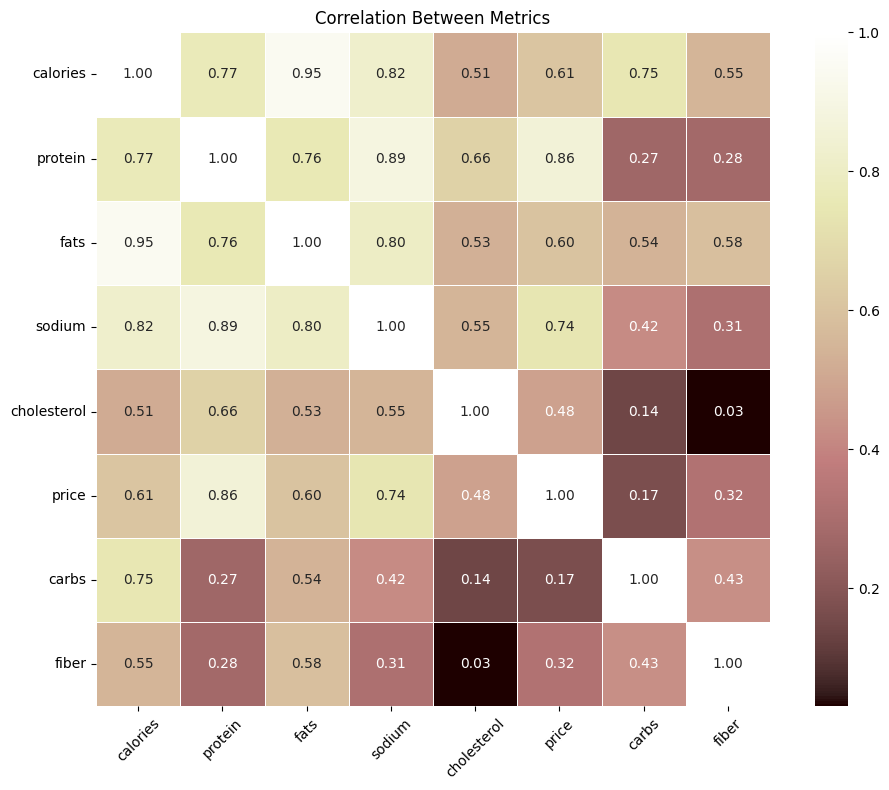

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='pink', square=True, linewidths=0.5)
plt.title('Correlation Between Metrics')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()